In [23]:
### EXECUTE ESSA CÉLULA PARA IMPORTAR AS BIBLIOTECAS NECESSÁRIAS ###
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.cluster import DBSCAN

__1)__ Os dados do titanic estão no arquivo `titanic_dataset.csv`. Carregue os dados na variável `df` utilizando o método de pandas que lê arquivos csv e retorna um dataframe. Pesquise na documentação do Pandas se necessário.

In [2]:
df = pd.read_csv("../_datasets/titanic_dataset.csv") ### CARREGAR ARQUIVO COMO DATAFRAME ##
df.dropna(inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [19]:
corr = df.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.148495,-0.089136,0.030933,-0.083488,-0.051454,0.029740
Survived,0.148495,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.089136,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,-0.083488,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,-0.051454,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.029740,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000


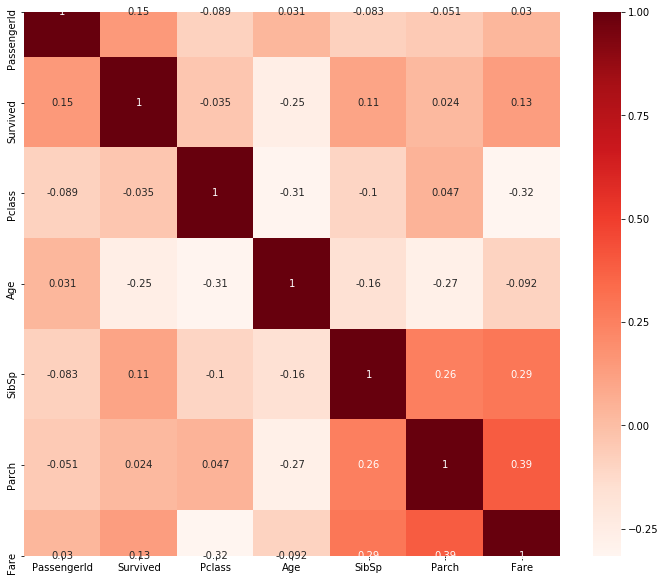

In [25]:
#Apresentando visualmente as correlações entre as variáveis do dataset
%matplotlib inline
gr = plt.subplots(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='Reds')

__2)__ Crie um novo dataframe contendo apenas as colunas __Age__ e __Fare__ e atribua à variável `Titanic_Age_Fare`

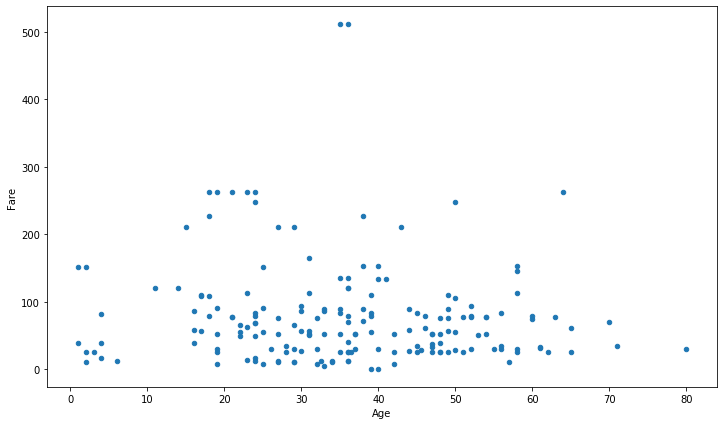

In [4]:
Titanic_Age_Fare = df[["Age","Fare"]] ### SELECIONAR APENAS COLUNAS AGE E FARE ##
#Titanic_Age_Fare.plot.scatter(x = "Age", y = "Fare", figsize=(12,7))
Titanic_Age_Fare.plot(kind='scatter', x = "Age", y = "Fare", figsize=(12,7))

__3)__ A essa altura do campeonato, vocês já devem saber que normalizar variáveis numéricas é uma prática importante de tratamento de dados. Importem o `MinMaxScaler()` do pacote `sklearn.preprocessing` para normalizar ambas as variáveis

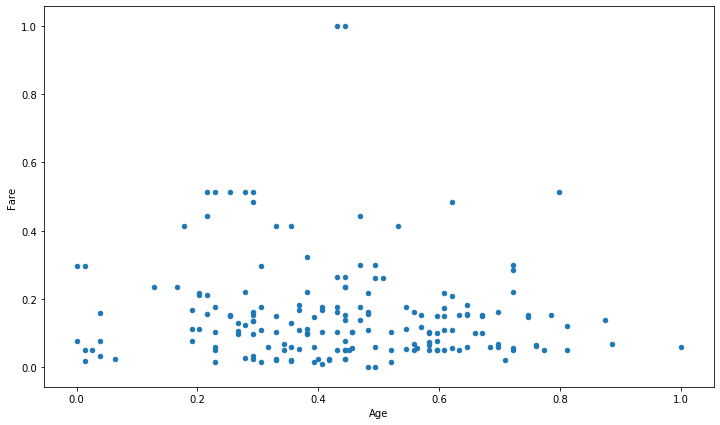

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() ### INSTANCIAR O MINMAXSCALER() ##
Titanic_Age_Fare = scaler.fit_transform(Titanic_Age_Fare, y=None) ### UTILIZAR O MÉTODO Fit_Transform() PASSANDO Titanic_Age_Fare COMO ARGUMENTO ###
Titanic_Age_Fare = pd.DataFrame(Titanic_Age_Fare, columns = ["Age", "Fare"])
Titanic_Age_Fare.plot.scatter(x = "Age", y = "Fare", figsize=(12,7))

__3)__ Com os dados separados e normalizados, vamos aplicar o DBSCAN e gerar a segmentação. Execute a célula abaixo definindo `eps` e `min_samples` até que o DBSCAN consiga separar corretamente os dados normais dos outliers

Valor de epsilon:  0.2
Valor de min_samples:  4


Outliers identificados com sucesso


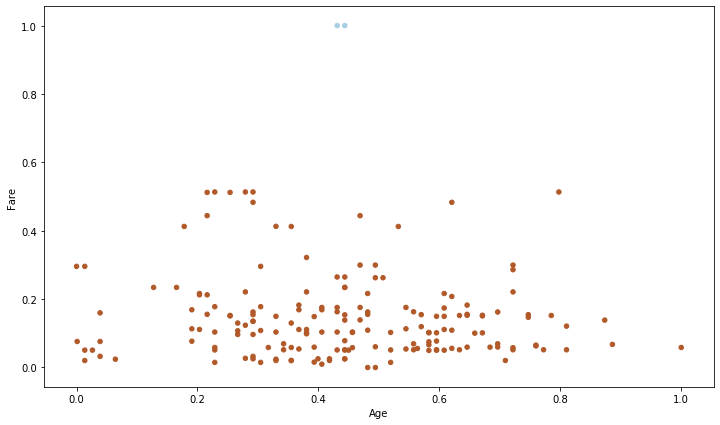

In [18]:
### EXECUTE ESSA CÉLULA PASSANDO OS INPUTS E APERTANDO ENTER ### 
### ANALISE OS CLUSTERS GERADOS ###
### SE OS OUTLIERS FOREM IDENTIFICADOS CORRETAMENTE, A FUNÇÃO CRIADA ABAIXO IRÁ PRINTAR "Outliers identificados com sucesso" ###

def DBSCAN_Clusters(eps, min_samples):
    
    Modelo = DBSCAN(
      eps = eps,
      metric="euclidean",
      min_samples = min_samples,
      n_jobs = -1)

    clusters = Modelo.fit_predict(Titanic_Age_Fare)
    cmap = cm.get_cmap('Paired')

    Titanic_Age_Fare.plot.scatter(
      x = "Age",
      y = "Fare",
      c = clusters,
      cmap = cmap,
      colorbar = False,
      figsize=(12,7)
    )
    
    if (clusters[137] == -1) and (clusters[153] == -1) and (np.count_nonzero(clusters == -1) == 2):
        print('Outliers identificados com sucesso')
    else:
        print('Outliers não foram identificados corretamente, tente outra combinação de eps e min_samples')

try:
    eps = float(input('Valor de epsilon: '))
    min_samples = int(input('Valor de min_samples: '))
    DBSCAN_Clusters(eps, min_samples)
    
except ValueError:
    print('Digite apenas números')